# Page View Time Series Visualizer

This project analyzes and visualizes web traffic data from the freeCodeCamp forum, covering May 2016 to December 2019. The dataset is cleaned to remove extreme outliers, and various visualizations are used to explore usage patterns over time.

## 📊 Visualizations

- **Line Plot** (`draw_line_plot()`):  
  Displays daily page views over time using a red line chart. Useful for observing long-term trends and irregularities in forum activity.

- **Bar Plot** (`draw_bar_plot()`):  
  Shows average monthly page views grouped by year. Uses grouped bars to compare seasonal patterns and highlight growth or dips across years.

- **Box Plots** (`draw_box_plot()`):  
  Compares the distribution of daily page views:  
  - **Year-wise**: to detect trends over time.  
  - **Month-wise**: to reveal seasonal variation.  
  Implemented using side-by-side box plots with customized labels and colors.

## 🧰 Tools Used

- Python  
- Pandas  
- Matplotlib  
- Seaborn  
- NumPy

---

*This project was developed as part of the freeCodeCamp Data Analysis with Python certification.*

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [21]:
# Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'])
df.set_index('date', inplace=True)

In [22]:
# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df[(df['value'] <= df['value'].quantile(0.975)) & (df['value'] >= df['value'].quantile(0.025))]

In [23]:
# Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.
def draw_line_plot():
    # Draw line plot
    
    ax = df.plot.line(color='firebrick', figsize=(20,6), title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019', xlabel='Date', ylabel='Page Views', legend=None )
    fig = ax.figure
    
    fig.savefig('line_plot.png')
    plt.close(fig)
    
    return fig

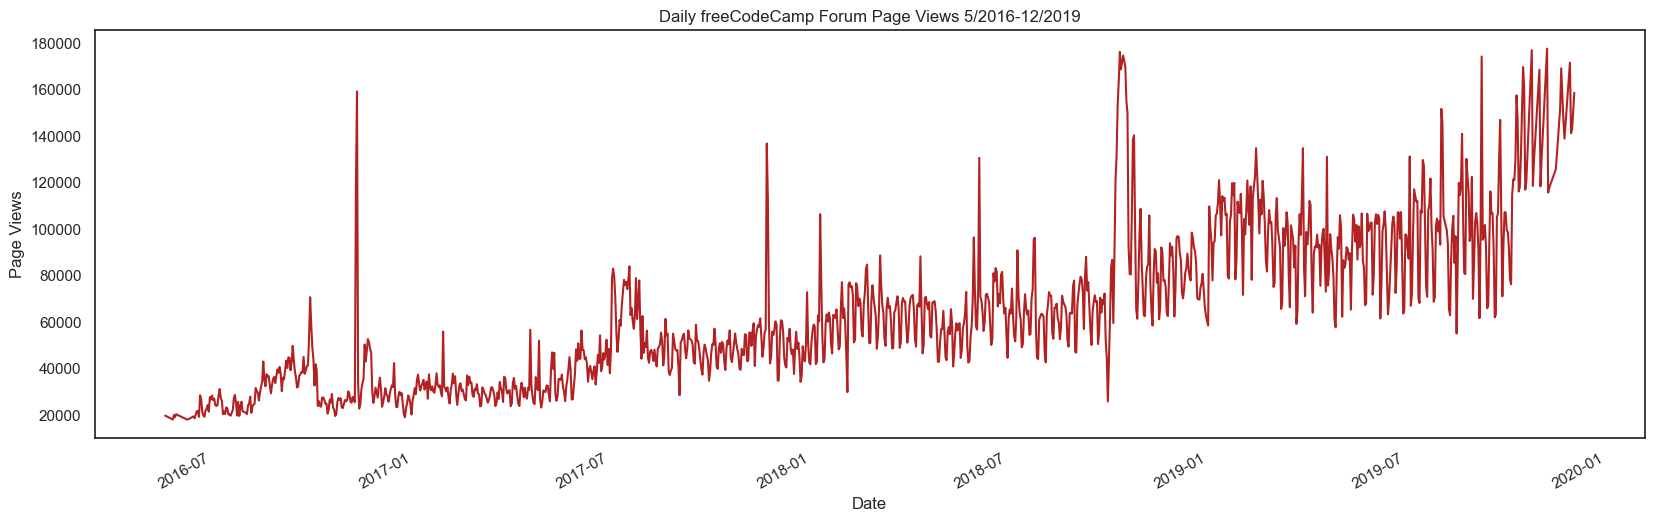

In [24]:
draw_line_plot()

In [25]:
# Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". 
    # It should show average daily page views for each month grouped by year. 
    # The legend should show month labels and have a title of Months.
    # On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    
    df1 = df.groupby(by=[(df.index.year), (df.index.month)]).mean()
    df1 = df1.reset_index(level=1)
    df1.rename(columns={'date': 'month'}, inplace=True)
    df1=df1.reset_index(level=0)
    
    df1['month'][df1['month']==1]='January'
    df1['month'][df1['month']==2]='February'
    df1['month'][df1['month']==3]='March'
    df1['month'][df1['month']==4]='April'
    df1['month'][df1['month']==5]='May'
    df1['month'][df1['month']==6]='June'
    df1['month'][df1['month']==7]='July'
    df1['month'][df1['month']==8]='August'
    df1['month'][df1['month']==9]='September'
    df1['month'][df1['month']==10]='October'
    df1['month'][df1['month']==11]='November'
    df1['month'][df1['month']==12]='December'

    hue_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    
    # Draw bar plot
    sns.set(style='ticks')
    df_bar = sns.catplot(x='date', y='value', hue='month', kind='bar', data=df1, legend=False, hue_order=hue_order, palette=sns.color_palette(['b', 'orange', 'g','r', 'tab:purple', 'tab:brown','tab:pink','tab:grey', 'y','c','royalblue','darkorange']))

    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.legend(loc='upper left', title='Months')
    
    fig = df_bar.fig


    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    plt.close(fig)
    
    return fig

C:\Users\elisa\AppData\Local\Temp\ipykernel_9708\248180065.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df1['month'][df1['month']==1]='January'
C:\Users\elisa\AppData\Local\Temp\ipykernel_9708\248180065.py:14: SettingWithCopyWarning:

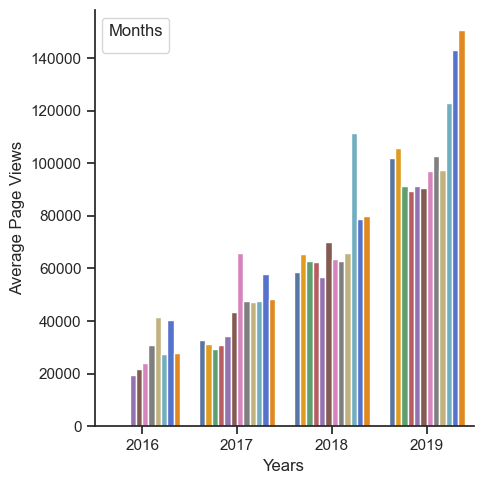

In [26]:
draw_bar_plot()

In [27]:
# Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png".
    # These box plots should show how the values are distributed within a given year or month and how it compares over time.
    # The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality).
    # Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly.
    # The boilerplate includes commands to prepare the data.

def draw_box_plot():
    df2 = df.groupby(by=[(df.index.year), (df.index.month), (df.index.day)]).sum()

    df2 = df2.reset_index(level=2)
    df2.rename(columns={'date': 'day'}, inplace=True)
    df2 = df2.reset_index(level=1)
    df2.rename(columns={'date': 'month'}, inplace=True)
    df2 = df2.reset_index(level=0)
    df2.rename(columns={'date': 'year'}, inplace=True)

    df2['month'][df2['month']==1]='Jan'
    df2['month'][df2['month']==2]='Feb'
    df2['month'][df2['month']==3]='Mar'
    df2['month'][df2['month']==4]='Apr'
    df2['month'][df2['month']==5]='May'
    df2['month'][df2['month']==6]='Jun'
    df2['month'][df2['month']==7]='Jul'
    df2['month'][df2['month']==8]='Aug'
    df2['month'][df2['month']==9]='Sep'
    df2['month'][df2['month']==10]='Oct'
    df2['month'][df2['month']==11]='Nov'
    df2['month'][df2['month']==12]='Dec'

    hue_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.set(style = 'white')

    ax1 = sns.boxplot(data = df2, x = 'year', y = 'value', ax = ax[0], linewidth = 0.5, fliersize = 1, palette = sns.color_palette("tab10"))
    ax1.set_xlabel('Year', fontsize = 7)
    ax1.set_ylabel('Page Views', fontsize = 7)
    ax1.set_title('Year-wise Box Plot (Trend)', fontsize = 10)
    ax1.set_yticks(np.arange(20000,220000,20000))
    ax1.xaxis.set_tick_params(labelsize = 7)
    ax1.yaxis.set_tick_params(labelsize = 7)


    ax2 = sns.boxplot(data = df2, x = 'month', y = 'value', ax = ax[1], linewidth = 0.5, fliersize = 1, palette = sns.color_palette('tab10'), order = hue_order)
    ax2.set_xlabel('Month', fontsize = 7)
    ax2.set_ylabel('Page Views', fontsize = 7)
    ax2.set_title('Month-wise Box Plot (Seasonality)', fontsize = 10)
    ax2.set_yticks(np.arange(20000,220000,20000))
    ax2.xaxis.set_tick_params(labelsize = 7)
    ax2.yaxis.set_tick_params(labelsize = 7)



    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    plt.close(fig)
    
    return fig

C:\Users\elisa\AppData\Local\Temp\ipykernel_9708\1146339816.py:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2['month'][df2['month']==1]='Jan'
C:\Users\elisa\AppData\Local\Temp\ipykernel_9708\1146339816.py:17: SettingWithCopyWarning: 


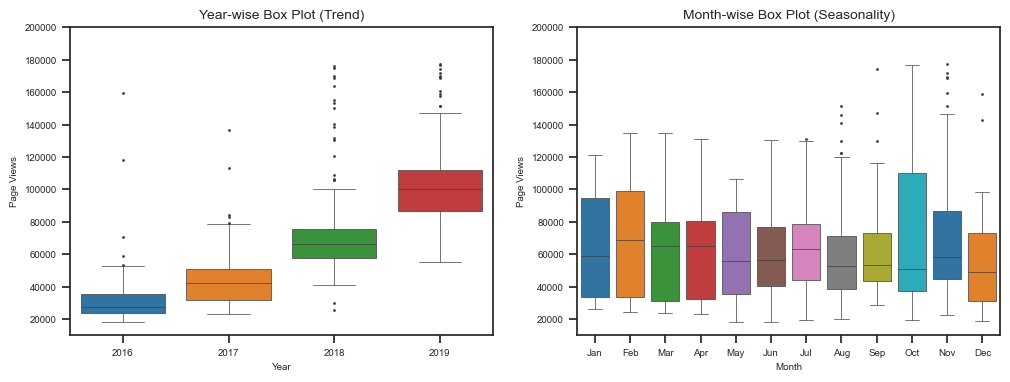

In [28]:
draw_box_plot()